### Exploratory Data Analysis (EDA)

1. Load Dataset

2. Clean Data (Missing values,Duplicates)

3. Treat Outliers

4. Univariate,Bivariate and Multi-variate analysis

5. Insights

#### Outliers - a data point that significantly different from other observation in dataset.

#### How outliers are formed--?
1. Measurment error

2. Data entry mistake

#### Why considering them is important--?
1. They can be errors

2. They effect data analysis

#### How to identify them--?
1. Statistical Methods

    Interquartile Range(IQR)

    Z-score

2. Visualization Techniques

    Box plots

    Scatter plots
    
    Histograms

### Univariate analysis
#### a method that analyzes a single variable to describe its characteristics, find patterns and sumarize data.
#### It involves only single variable.

### Bivariate analysis
#### It provides relationship between 2 variables.
#### It helps in finding if correlations, associations or connections exixt between 2 variables.
#### Involves more 2 variables

### Multivariate analysis
#### To understand how multiple factors interact & influence each other.
#### Involves more than 2 variables

Example-
How our age ,income, and education level together influence the purchasing behaviour.


## ETL

### EDA : < Dataset >

1. Load & Overview

2. Cleaning (missing, dupes, dtypes)

3. Uni,Bi,Multi variate analysis

4. Outlier - IQR

5. Feature Engineering

6. Key Insights


#### Feature Engineering - It is the process of turning raw data into useful features that helps to improve the perfomance of ml models

In [1]:
# 1. Load dataset &Libraries

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df =sns.load_dataset('titanic')

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# Basic info
print("Shape of dataset:",df.shape)
print("\n Data Info \n")
df.info()

#Summary Statistics
df.describe(include='all')

Shape of dataset: (891, 15)

 Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Missing values analysis

missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [23]:
# Handling missing values

# Fill numeric missing with mean
df['age']=df['age'].fillna(df['age'].mean())

# Fill categorical missing with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' column (too many missing values)
df.drop(columns=['deck'],inplace=True)

print("Missing values after cleaning:\n",df.isnull().sum())


Missing values after cleaning:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [24]:
# Missing values analysis

missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


Insights: We filled important columns and removed highly missing ones.

This keeps maximum information while making the dataset clean.

In [6]:
print("Duplicates: ", df.duplicated().sum())

Duplicates:  107


In [7]:
## Convert some columns to category type
df['class'] = df['class'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4), object(3)
memory usage: 68.7+ KB


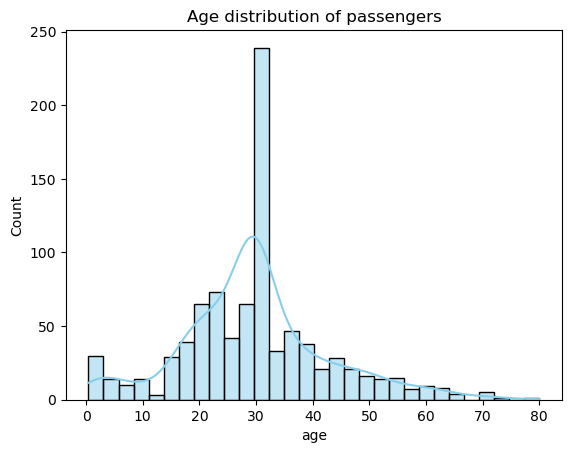

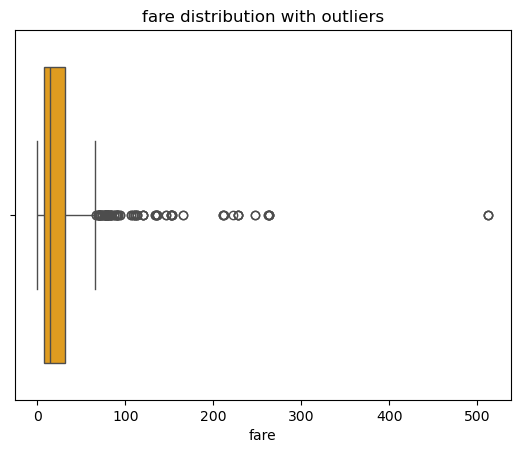

In [25]:
# Univariate analysis
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

# Histogram:age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age distribution of passengers")
plt.show()

# Boxplot: fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("fare distribution with outliers")
plt.show()


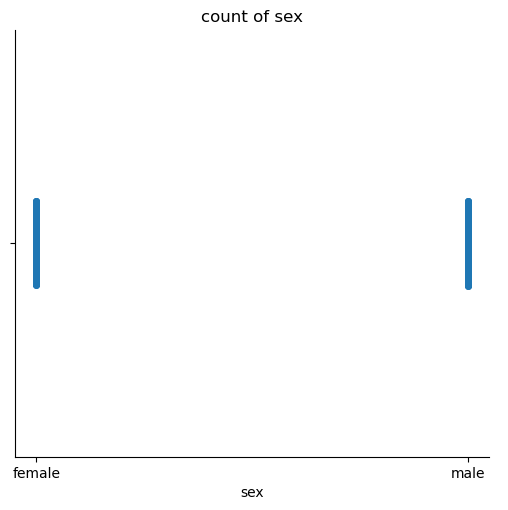

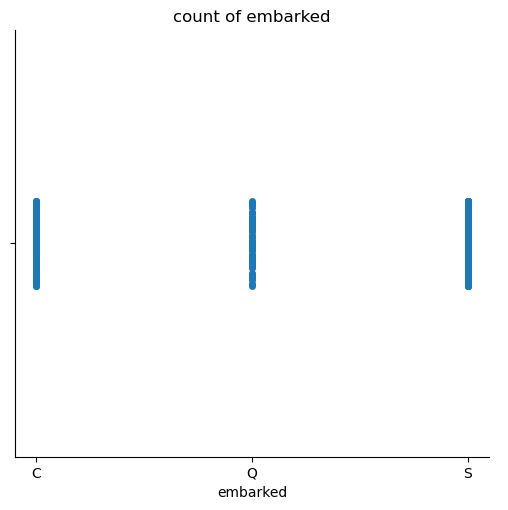

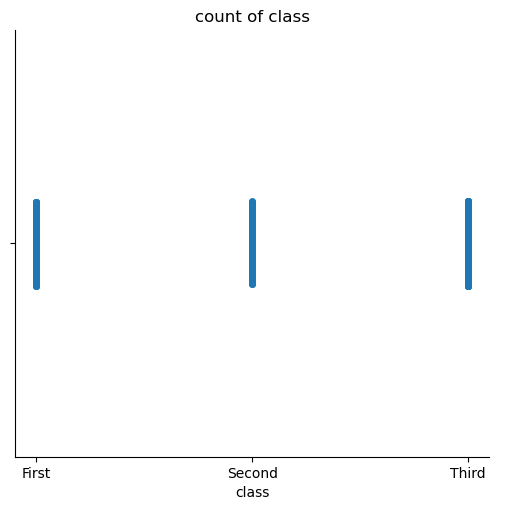

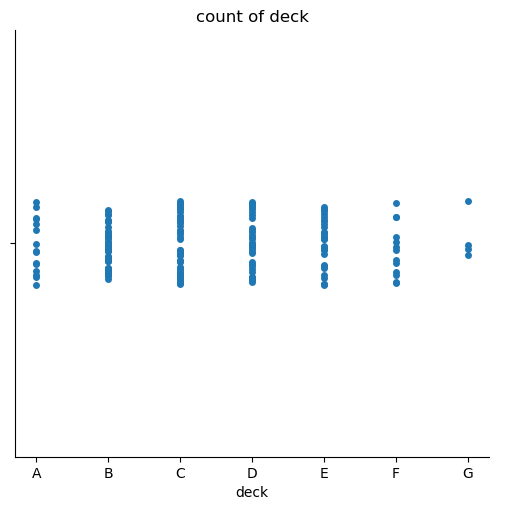

In [8]:
# Univariate analysis - Categorical Features
cat_cols=df.select_dtypes('category').columns

for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f'count of {col}')
    plt.show()

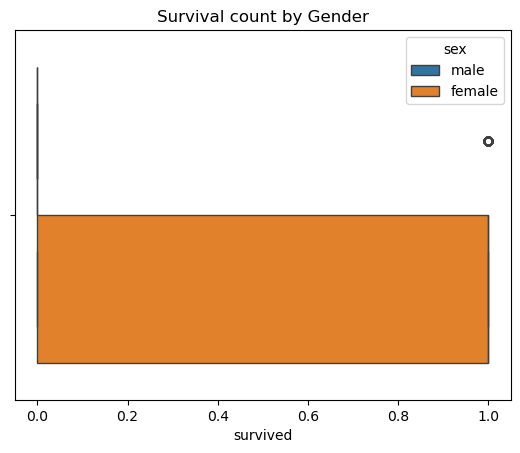

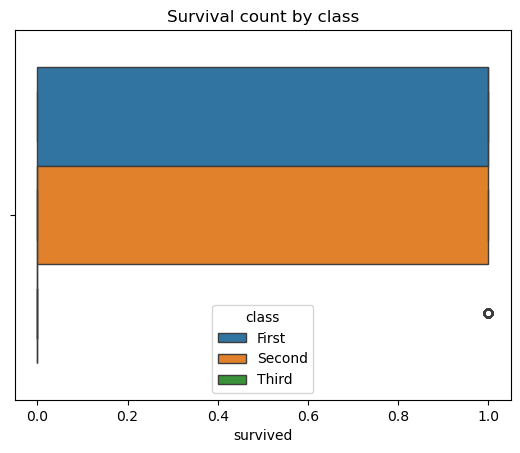

In [28]:
# Bivariate analysis Categorical vs Categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("Survival count by Gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("Survival count by class")
plt.show()

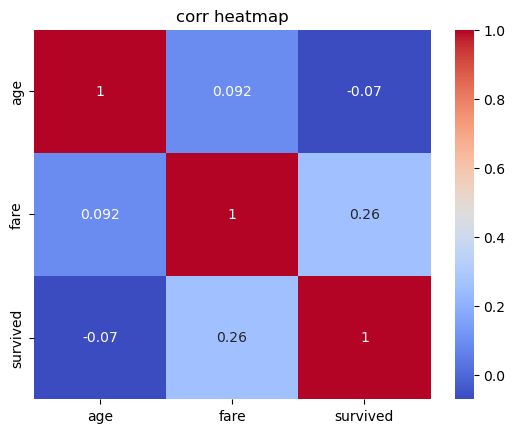

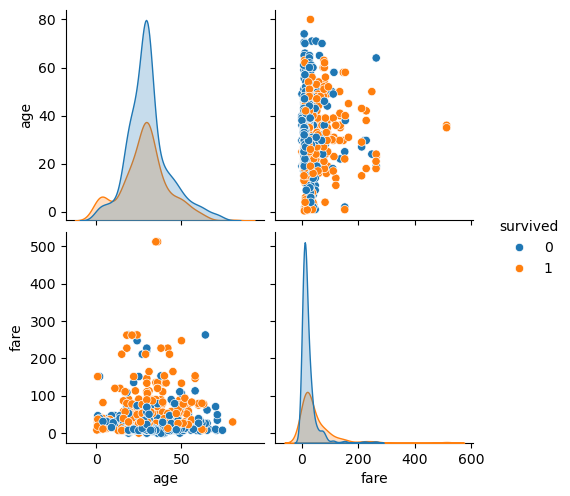

In [30]:
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('corr heatmap')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Insights:

1. Fare has a positive correlation with survival

2. Age shows slight negative correlation with survival.

outliers:  116


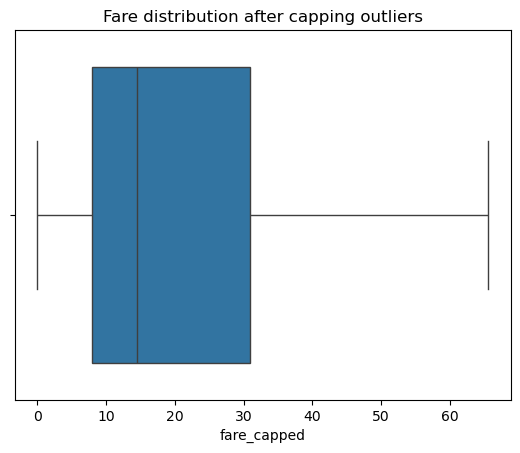

In [34]:
# Outlier datection using IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
iqr=Q3-Q1
lower_bound=Q1-1.5*iqr
upper_bound=Q3+1.5*iqr
outliers=df[(df['fare']<lower_bound) | (df['fare']>upper_bound)]
print("outliers: ",len(outliers))
df['fare_capped']=df['fare'].clip(lower_bound,upper_bound)
sns.boxplot(x=df['fare_capped'])
plt.title('Fare distribution after capping outliers')
plt.show()

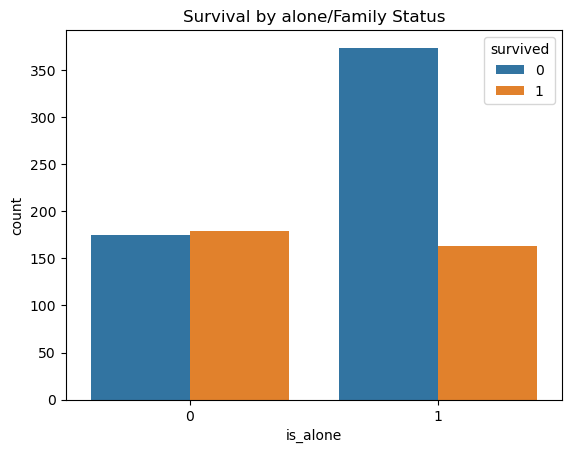

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [9]:
# Feature Engineering
# create new feature
df['family_size']=df['sibsp']+df['parch']+1
df['is_alone']=(df['family_size']==1).astype(int)
sns.countplot(x='is_alone',hue='survived',data=df)
plt.title('Survival by alone/Family Status')
plt.show()
df[['family_size','is_alone','survived']].head()

In [10]:
# Export cleaned data
df.to_csv('Titanic_cleaned.csv',index=False)
print('cleaned data is saved')


cleaned data is saved


In [11]:
import os
print(os.getcwd())

c:\64\Week_6(EDA)
